# Fitting the Features to Models pt. 2

In [584]:
import pandas as pd
from IPython.display import display
from math import radians, cos, sin, asin, sqrt
import scipy
from scipy.stats import zscore
from datetime import datetime

# Load the dataset
trainingSet = pd.read_csv("../data/X_train.csv")
testingSet = pd.read_csv("../data/X_test.csv")



In [585]:
display(trainingSet)
display(testingSet)

,Id,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time
0,205743,5.596350e+15,fraud_Berge LLC,gas_transport,72.18,Joseph,Moody,M,5901 Foster Pine,Kenner,...,68211,"Engineer, petroleum",23/04/1941,5223f3d810e0083482e47a5c3a1eba94,1378023768,30.424083,-90.080958,0.0,2020-09-01,08:22:00
1,465349,4.311370e+18,"fraud_Eichmann, Bogan and Rodriguez",gas_transport,36.66,Phillip,Delacruz,M,26678 Lisa Locks Apt. 904,Iliff,...,648,Community arts worker,21/09/1969,25f3a9b8613a9745c5802031bd3a2c62,1386834132,39.871664,-103.457961,0.0,2020-12-12,07:42:00
2,17312,2.264940e+15,fraud_Ankunding-Carroll,travel,1.74,Juan,Sherman,M,5939 Garcia Forges Suite 297,San Antonio,...,1595797,Land,17/10/1995,2a6f3f7c697bc721a80078aefd68d857,1372338223,28.456118,-98.491336,0.0,2020-06-27,13:03:00
3,234968,2.224100e+15,"fraud_Schumm, Bauch and Ondricka",grocery_pos,140.99,Sheri,Thomas,F,019 Kimberly Light Apt. 039,Kings Bay,...,1293,Naval architect,11/09/1963,fcd03eb50b00fe682d8a47f3bec089a6,1379131971,31.292136,-82.002506,0.0,2020-09-14,04:12:00
4,194255,3.527540e+15,fraud_Gerlach Inc,shopping_net,1722.19,Teresa,Stein,F,2838 White Fields Apt. 473,Brunson,...,1725,Social researcher,05/12/1974,d3105e269285b69b334e99433d6a6585,1377711655,33.067620,-80.201090,0.0,2020-08-28,17:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486249,502355,4.292900e+18,fraud_Wilkinson PLC,kids_pets,4.30,Jeffrey,Smith,M,135 Joseph Mountains,Sula,...,218,"Therapist, horticultural",16/08/1995,7e6011097067231cf9178de050f4dd4c,1387546102,46.332036,-114.660338,0.0,2020-12-20,13:28:00
486250,527890,2.131570e+14,fraud_Kuvalis Ltd,gas_transport,34.85,Adam,Santos,M,725 Jo Trace Apt. 102,Glendale,...,172817,Advertising account planner,30/07/1982,5f5926277386db598df3be7a7d5d491d,1388022446,33.229608,-118.386434,0.0,2020-12-26,01:47:00
486251,253663,6.763730e+11,"fraud_Hodkiewicz, Prohaska and Paucek",travel,9.22,Vicki,Mendoza,F,3645 Atkins Island Apt. 238,Esbon,...,242,Tourism officer,18/07/1987,04b32f0a628784474a8f48f977605c4d,1379807336,39.316927,-97.617048,0.0,2020-09-21,23:48:00
486252,33882,3.026700e+13,fraud_Kihn-Fritsch,food_dining,9.39,Sarah,Foster,F,77872 Andrea Glen Apt. 543,Ford,...,1051,Chief Operating Officer,21/11/1976,cfe6c288ba518822c1b6822515a165e1,1372807037,37.084437,-78.715023,0.0,2020-07-02,23:17:00


,Id,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,trans_date,trans_time,is_fraud
0,488867,4.457730e+18,fraud_Ziemann-Waters,health_fitness,72.59,Stanley,Mayo,M,3433 Jones Branch,Fiddletown,...,832,Immigration officer,19/05/1987,af0ddbf684250d1d70b07ee00a3d4383,1387237739,38.768799,-121.484187,2020-12-16,23:48:00,NaN
1,147015,3.741250e+14,"fraud_Robel, Cummerata and Prosacco",gas_transport,61.66,Christopher,Gilbert,M,20937 Reed Lakes Apt. 271,Washington,...,601723,"Optician, dispensing",20/07/1970,e5780c5487e02483e64aa60f309232b4,1376216316,39.884246,-76.078998,2020-08-11,10:18:00,NaN
2,213848,3.576020e+15,fraud_Kutch LLC,gas_transport,64.64,Dawn,Gray,F,9486 Joel Common Suite 554,Topeka,...,163415,Secondary school teacher,30/12/2004,76226c55ff881a0941ec88d817c2c699,1378348294,39.884929,-95.827237,2020-09-05,02:31:00,NaN
3,527654,6.011650e+15,fraud_Erdman-Ebert,personal_care,3.07,Kathryn,Smith,F,19838 Tonya Prairie Apt. 947,Rocky Mount,...,1847,Tax inspector,26/10/1988,373db9f33c9409576b2c973f477a7344,1388015439,38.992936,-91.785378,2020-12-25,23:50:00,NaN
4,318500,6.011650e+15,fraud_Jaskolski-Dibbert,grocery_net,66.38,Kathryn,Smith,F,19838 Tonya Prairie Apt. 947,Rocky Mount,...,1847,Tax inspector,26/10/1988,f9420a66faa71750ede49bfaa59c7164,1382260329,37.587920,-92.689750,2020-10-20,09:12:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69460,518797,3.534330e+15,"fraud_Douglas, Schneider and Turner",shopping_pos,136.87,Jeffrey,Smith,M,713 Scott Pike Apt. 712,Bridger,...,1446,Chartered loss adjuster,15/01/1978,f22ec69f2a872d05128f26dfb72ad94c,1387792013,44.407510,-108.189002,2020-12-23,09:46:00,NaN
69461,429820,4.951650e+15,"fraud_Rutherford, Homenick and Bergstrom",grocery_net,39.83,Kimberly,Miller,F,75533 Tamara Valleys,Logan,...,324,"Scientist, research (physical sciences)",15/06/1976,3bcc1af8bcfe2aa0c61aacee5a92b31b,1386150068,38.582503,-88.479525,2020-12-04,09:41:00,NaN
69462,356090,3.533800e+15,"fraud_Moen, Reinger and Murphy",grocery_pos,140.49,Amber,Thornton,F,840 Werner Lock Apt. 852,Campbell,...,493,"Surveyor, minerals",13/09/1940,72f5b24ad9e882cc034186c9ed49b691,1383721926,40.276547,-98.209641,2020-11-06,07:12:00,NaN
69463,107848,4.683520e+15,"fraud_Bradtke, Torp and Bahringer",personal_care,21.43,Charles,Carrillo,M,17547 Stephen Turnpike Apt. 846,Hawthorne,...,93193,"Editor, magazine features",19/04/1995,96889bea22c0811a951b3a16e4d213eb,1375020660,33.097685,-117.464408,2020-07-28,14:11:00,NaN


In [586]:
############# TIME FEATURES

# Make sure the 'trans_date' and 'trans_time' are in the right datetime format
trainingSet['trans_date'] = pd.to_datetime(trainingSet['trans_date'])
trainingSet['trans_time'] = pd.to_timedelta(trainingSet['trans_time'].astype(str))

testingSet['trans_date'] = pd.to_datetime(testingSet['trans_date'])
testingSet['trans_time'] = pd.to_timedelta(testingSet['trans_time'].astype(str))

# Extract day of week and hour of day
trainingSet['day_of_week'] = trainingSet['trans_date'].dt.day_name()
trainingSet['hour_of_day'] = trainingSet['trans_time'].dt.components['hours']

testingSet['day_of_week'] = testingSet['trans_date'].dt.day_name()
testingSet['hour_of_day'] = testingSet['trans_time'].dt.components['hours']

# Mapping day names to integers (1-7)
day_to_int_map = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

# Apply the mapping to the 'day_of_week' column
trainingSet['day_of_week'] = trainingSet['day_of_week'].map(day_to_int_map)
testingSet['day_of_week'] = testingSet['day_of_week'].map(day_to_int_map)

# Define high-risk hours
high_risk_hours = set(range(21, 24)).union(set(range(0, 6)))

# Create the 'high_risk_time' feature based on 'hour_of_day'
trainingSet['high_risk_time'] = trainingSet['hour_of_day'].apply(lambda x: 1 if x in high_risk_hours else 0)
testingSet['high_risk_time'] = testingSet['hour_of_day'].apply(lambda x: 1 if x in high_risk_hours else 0)

testingSet.count()

Id                69465
cc_num            69465
merchant          69465
category          69465
amt               69465
first             69465
last              69465
gender            69465
street            69465
city              69465
state             69465
zip               69465
lat               69465
long              69465
city_pop          69465
job               69465
dob               69465
trans_num         69465
unix_time         69465
merch_lat         69465
merch_long        69465
trans_date        69465
trans_time        69465
is_fraud              0
day_of_week       69465
hour_of_day       69465
high_risk_time    69465
dtype: int64

In [587]:
############# CATEGORY FEATURES

# Step 1: Calculate the mean and standard deviation for each category
category_stats = trainingSet.groupby('category')['amt'].agg(['mean', 'std']).reset_index()
category_stats_test = testingSet.groupby('category')['amt'].agg(['mean', 'std']).reset_index()
# Rename the columns to be more descriptive
category_stats = category_stats.rename(columns={'mean': 'category_mean_amt', 'std': 'category_std_amt'})
category_stats_test = category_stats_test.rename(columns={'mean': 'category_mean_amt', 'std': 'category_std_amt'})
# Step 2: Merge these statistics back into the original dataframe
trainingSet = trainingSet.merge(category_stats, how='left', on='category')
testingSet = testingSet.merge(category_stats_test, how='left', on='category')
# Step 3: Create a binary feature that flags a transaction as an outlier
def is_outlier(row):
    if pd.isnull(row['category_std_amt']):  # If std is NaN, cannot determine if it's an outlier
        return 0
    lower_bound = row['category_mean_amt'] - 3 * row['category_std_amt']
    upper_bound = row['category_mean_amt'] + 3 * row['category_std_amt']
    return int(not lower_bound <= row['amt'] <= upper_bound)

trainingSet['category_outlier'] = trainingSet.apply(is_outlier, axis=1)
testingSet['category_outlier'] = testingSet.apply(is_outlier, axis=1)

# There are also some high risk categories, so lets make a feature for that
# Define high-risk categories
high_risk_categories = ['shopping_net', 'entertainment', 'shopping_pos', 'misc_net']

# For each category in the list, create a new column in both training and testing sets
for category in high_risk_categories:
    trainingSet[f'is_{category}'] = (trainingSet['category'] == category).astype(int)
    testingSet[f'is_{category}'] = (testingSet['category'] == category).astype(int)

    # Assuming 'hour_of_day' and 'category' are columns in your dataframe
# And assuming the hour_of_day is already calculated correctly

# Feature for grocery_pos during hours 0-4
trainingSet['is_grocery_pos_0_4'] = ((trainingSet['hour_of_day'] <= 4) & 
                                     (trainingSet['category'] == 'grocery_pos')).astype(int)

# Feature for shopping_net during hours 22-23
trainingSet['is_shopping_net_22_23'] = ((trainingSet['hour_of_day'] >= 22) & 
                                        (trainingSet['category'] == 'shopping_net')).astype(int)

# Similarly, create the features for the test dataset
testingSet['is_grocery_pos_0_4'] = ((testingSet['hour_of_day'] <= 4) & 
                                     (testingSet['category'] == 'grocery_pos')).astype(int)

testingSet['is_shopping_net_22_23'] = ((testingSet['hour_of_day'] >= 22) & 
                                        (testingSet['category'] == 'shopping_net')).astype(int)


In [588]:
############# AMOUNT FEATURES

# Define the ranges as conditions
conditions = [
    (trainingSet['amt'] >= 0) & (trainingSet['amt'] <= 50),
    (trainingSet['amt'] >= 250) & (trainingSet['amt'] <= 350),
    (trainingSet['amt'] >= 650) & (trainingSet['amt'] <= 1200)
]

# Define the feature names
feature_names = ['is_amt_0_50', 'is_amt_250_350', 'is_amt_650_1200']

# Create the features in the training set
for condition, feature_name in zip(conditions, feature_names):
    trainingSet[feature_name] = condition.astype(int)

# Repeat for the testing set
conditions_test = [
    (testingSet['amt'] >= 0) & (testingSet['amt'] <= 50),
    (testingSet['amt'] >= 250) & (testingSet['amt'] <= 350),
    (testingSet['amt'] >= 650) & (testingSet['amt'] <= 1200)
]

for condition, feature_name in zip(conditions_test, feature_names):
    testingSet[feature_name] = condition.astype(int)


In [589]:
############# DISTANCE FEATURES

# for generating distances

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great-circle distance between two points 
    on the Earth (specified in decimal degrees)
    """
    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of Earth in kilometers. Use 3956 for miles
    return c * r

# Now apply this function to the dataframe to create the distance feature
trainingSet['distance_from_home'] = trainingSet.apply(lambda row: haversine(row['long'], row['lat'], row['merch_long'], row['merch_lat']), axis=1)
testingSet['distance_from_home'] = testingSet.apply(lambda row: haversine(row['long'], row['lat'], row['merch_long'], row['merch_lat']), axis=1)


In [590]:
############# DISTANCE & AMOUNT FEATURES

# Calculate the mean transaction amount and distance for each customer
customer_means = trainingSet.groupby('cc_num').agg({'amt': 'mean', 'distance_from_home': 'mean'}).rename(columns={'amt': 'mean_amt', 'distance_from_home': 'mean_distance'})
customer_means_testing = testingSet.groupby('cc_num').agg({'amt': 'mean', 'distance_from_home': 'mean'}).rename(columns={'amt': 'mean_amt', 'distance_from_home': 'mean_distance'})
# Join the customer means back onto the transaction dataframe
trainingSet = trainingSet.join(customer_means, on='cc_num')
testingSet = testingSet.join(customer_means_testing, on='cc_num')
# Calculate deviations for amount and distance

trainingSet['amt_deviation'] = (trainingSet['amt'] - trainingSet['mean_amt']) / trainingSet['mean_amt']
trainingSet['distance_deviation'] = (trainingSet['distance_from_home'] - trainingSet['mean_distance']) / trainingSet['mean_distance']

testingSet['amt_deviation'] = (testingSet['amt'] - testingSet['mean_amt']) / testingSet['mean_amt']
testingSet['distance_deviation'] = (testingSet['distance_from_home'] - testingSet['mean_distance']) / testingSet['mean_distance']

trainingSet['amt_deviation_z'] = trainingSet.groupby('cc_num')['amt_deviation'].transform(zscore)
trainingSet['distance_deviation_z'] = trainingSet.groupby('cc_num')['distance_deviation'].transform(zscore)

testingSet['amt_deviation_z'] = testingSet.groupby('cc_num')['amt_deviation'].transform(zscore)
testingSet['distance_deviation_z'] = testingSet.groupby('cc_num')['distance_deviation'].transform(zscore)

trainingSet['atypical_transaction'] = ((trainingSet['amt_deviation_z'] > 3) | (trainingSet['distance_deviation_z'] > 3)).astype(int)
testingSet['atypical_transaction'] = ((testingSet['amt_deviation_z'] > 3) | (testingSet['distance_deviation_z'] > 3)).astype(int)

testingSet['amt_deviation_z'].fillna(0, inplace=True) 
testingSet['distance_deviation_z'].fillna(0, inplace=True) 
# Now, there doesnt seem to be any null values, but let's verify:
null_counts = testingSet.isnull().sum()

print("\nNumber of null values in each column:\n", null_counts)



Number of null values in each column:
 Id                           0
cc_num                       0
merchant                     0
category                     0
amt                          0
first                        0
last                         0
gender                       0
street                       0
city                         0
state                        0
zip                          0
lat                          0
long                         0
city_pop                     0
job                          0
dob                          0
trans_num                    0
unix_time                    0
merch_lat                    0
merch_long                   0
trans_date                   0
trans_time                   0
is_fraud                 69465
day_of_week                  0
hour_of_day                  0
high_risk_time               0
category_mean_amt            0
category_std_amt             0
category_outlier             0
is_shopping_net              0

In [591]:
############# CONVERTING DOB TO AGE FEATURE
trainingSet['age'] = trainingSet['dob'].apply(lambda x: datetime.now().year - datetime.strptime(x, "%d/%m/%Y").year)
testingSet['age'] = testingSet['dob'].apply(lambda x: datetime.now().year - datetime.strptime(x, "%d/%m/%Y").year)

############# CONVERTING DAYS OF THE WEEK TO ISWEEKEND FEATURE

# consolidating the days of the week into a binary feature like "weekend" versus "weekday" could provide a more powerful 
# signal for the model by reducing the dimensionality and focusing on a broader pattern that might be more relevant to fraud detection.

# Create a new binary column 'is_weekend', where 1 indicates a weekend (Saturday or Sunday) and 0 indicates a weekday
trainingSet['is_weekend'] = trainingSet['day_of_week'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)
testingSet['is_weekend'] = testingSet['day_of_week'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)
############# ONE HOT ENCODING GENDER FEATURE

# Use `pd.get_dummies` to one-hot encode the gender column
gender_dummies = pd.get_dummies(trainingSet['gender'], prefix='gender_encoding', drop_first=True).astype(int)
gender_dummies_test = pd.get_dummies(testingSet['gender'], prefix='gender_encoding', drop_first=True).astype(int)

# Concatenate the new dummy columns with the original DataFrame
trainingSet = pd.concat([trainingSet, gender_dummies], axis=1)
testingSet = pd.concat([testingSet, gender_dummies_test], axis=1)



In [592]:
testingSet.count()

Id                       69465
cc_num                   69465
merchant                 69465
category                 69465
amt                      69465
first                    69465
last                     69465
gender                   69465
street                   69465
city                     69465
state                    69465
zip                      69465
lat                      69465
long                     69465
city_pop                 69465
job                      69465
dob                      69465
trans_num                69465
unix_time                69465
merch_lat                69465
merch_long               69465
trans_date               69465
trans_time               69465
is_fraud                     0
day_of_week              69465
hour_of_day              69465
high_risk_time           69465
category_mean_amt        69465
category_std_amt         69465
category_outlier         69465
is_shopping_net          69465
is_entertainment         69465
is_shopp

In [593]:
display(trainingSet)
display(testingSet)

,Id,cc_num,merchant,category,amt,first,last,gender,street,city,...,mean_amt,mean_distance,amt_deviation,distance_deviation,amt_deviation_z,distance_deviation_z,atypical_transaction,age,is_weekend,gender_encoding_M
0,205743,5.596350e+15,fraud_Berge LLC,gas_transport,72.18,Joseph,Moody,M,5901 Foster Pine,Kenner,...,57.797517,80.336668,0.248843,-0.368441,0.215040,-0.969531,0,83,0,1
1,465349,4.311370e+18,"fraud_Eichmann, Bogan and Rodriguez",gas_transport,36.66,Phillip,Delacruz,M,26678 Lisa Locks Apt. 904,Iliff,...,63.399076,76.229090,-0.421758,0.369457,-0.288475,0.978368,0,55,0,1
2,17312,2.264940e+15,fraud_Ankunding-Carroll,travel,1.74,Juan,Sherman,M,5939 Garcia Forges Suite 297,San Antonio,...,40.816940,80.750118,-0.957371,0.250315,-0.560623,0.681020,0,29,0,1
3,234968,2.224100e+15,"fraud_Schumm, Bauch and Ondricka",grocery_pos,140.99,Sheri,Thomas,F,019 Kimberly Light Apt. 039,Kings Bay,...,59.066132,80.765233,1.386985,-0.134905,1.155566,-0.375547,0,61,0,0
4,194255,3.527540e+15,fraud_Gerlach Inc,shopping_net,1722.19,Teresa,Stein,F,2838 White Fields Apt. 473,Brunson,...,63.335838,78.770719,26.191398,0.173317,9.101567,0.456431,1,50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486249,502355,4.292900e+18,fraud_Wilkinson PLC,kids_pets,4.30,Jeffrey,Smith,M,135 Joseph Mountains,Sula,...,70.500530,70.807763,-0.939008,0.149358,-0.972939,0.358629,0,29,0,1
486250,527890,2.131570e+14,fraud_Kuvalis Ltd,gas_transport,34.85,Adam,Santos,M,725 Jo Trace Apt. 102,Glendale,...,72.850973,76.856481,-0.521626,0.352516,-0.089752,0.928646,0,42,0,1
486251,253663,6.763730e+11,"fraud_Hodkiewicz, Prohaska and Paucek",travel,9.22,Vicki,Mendoza,F,3645 Atkins Island Apt. 238,Esbon,...,64.853593,77.254689,-0.857834,0.116624,-0.213764,0.304841,0,37,0,0
486252,33882,3.026700e+13,fraud_Kihn-Fritsch,food_dining,9.39,Sarah,Foster,F,77872 Andrea Glen Apt. 543,Ford,...,71.111471,76.401974,-0.867954,0.138206,-0.208586,0.366162,0,48,0,0


,Id,cc_num,merchant,category,amt,first,last,gender,street,city,...,mean_amt,mean_distance,amt_deviation,distance_deviation,amt_deviation_z,distance_deviation_z,atypical_transaction,age,is_weekend,gender_encoding_M
0,488867,4.457730e+18,fraud_Ziemann-Waters,health_fitness,72.59,Stanley,Mayo,M,3433 Jones Branch,Fiddletown,...,95.780826,77.151548,-0.242124,-0.024254,-0.304071,-0.062500,0,37,0,1
1,147015,3.741250e+14,"fraud_Robel, Cummerata and Prosacco",gas_transport,61.66,Christopher,Gilbert,M,20937 Reed Lakes Apt. 271,Washington,...,63.957500,79.757947,-0.035922,0.627611,-0.017098,1.857067,0,54,0,1
2,213848,3.576020e+15,fraud_Kutch LLC,gas_transport,64.64,Dawn,Gray,F,9486 Joel Common Suite 554,Topeka,...,49.971729,76.158543,0.293531,0.106979,0.147295,0.304085,0,20,0,0
3,527654,6.011650e+15,fraud_Erdman-Ebert,personal_care,3.07,Kathryn,Smith,F,19838 Tonya Prairie Apt. 947,Rocky Mount,...,55.637500,78.789272,-0.944821,0.417976,-0.558779,1.163184,0,36,0,0
4,318500,6.011650e+15,fraud_Jaskolski-Dibbert,grocery_net,66.38,Kathryn,Smith,F,19838 Tonya Prairie Apt. 947,Rocky Mount,...,55.637500,78.789272,0.193080,-0.007443,0.114190,-0.020712,0,36,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69460,518797,3.534330e+15,"fraud_Douglas, Schneider and Turner",shopping_pos,136.87,Jeffrey,Smith,M,713 Scott Pike Apt. 712,Bridger,...,101.322435,76.291046,0.350836,0.480075,0.279999,1.194969,0,46,0,1
69461,429820,4.951650e+15,"fraud_Rutherford, Homenick and Bergstrom",grocery_net,39.83,Kimberly,Miller,F,75533 Tamara Valleys,Logan,...,57.732698,78.307112,-0.310096,-0.018693,-0.164572,-0.051733,0,48,0,0
69462,356090,3.533800e+15,"fraud_Moen, Reinger and Murphy",grocery_pos,140.49,Amber,Thornton,F,840 Werner Lock Apt. 852,Campbell,...,68.558974,72.759676,1.049185,-0.384446,1.022606,-1.001046,0,84,0,0
69463,107848,4.683520e+15,"fraud_Bradtke, Torp and Bahringer",personal_care,21.43,Charles,Carrillo,M,17547 Stephen Turnpike Apt. 846,Hawthorne,...,43.737835,76.189687,-0.510035,0.606226,-0.580257,1.592888,0,29,0,1


### New features

In [594]:
### Ordinal encoding of features
# 1: low
# 2: medium
# 3: high

################# At Risk states / Cities
##### STATE
# Calculate the number of fraudulent transactions for each state
state_fraud_count = trainingSet[trainingSet['is_fraud'] == 1].groupby('state')['is_fraud'].count().sort_values(ascending=False)

# Calculate the rate of fraud per capita for each state
state_fraud_rate = trainingSet[trainingSet['is_fraud'] == 1].groupby('state').apply(lambda x: x['is_fraud'].count() / x['city_pop'].unique().sum())

# For states
state_quartiles = state_fraud_rate.quantile([0.33, 0.66])
state_risk_score = state_fraud_rate.apply(
    lambda x: 1 if x <= state_quartiles.iloc[0] else (2 if x <= state_quartiles.iloc[1] else 3)
)

# Reset index to turn series into DataFrame
# state_risk_score_df = state_risk_score.reset_index(name='state_risk_score')
# Then, merge these risk scores back into your original DataFrame

# Correctly merge the state risk scores, ensuring all rows in the original DataFrame are kept
trainingSet = trainingSet.merge(state_risk_score.rename('state_risk_score'), left_on='state', right_index=True, how='left')
testingSet = testingSet.merge(state_risk_score.rename('state_risk_score'), left_on='state', right_index=True, how='left')

# Fill missing values for states that were not in the training set's state_risk_score calculation
default_risk_score = 1  # Assuming '1' represents low risk

#trainingSet = trainingSet.merge(state_risk_score_df, on='state', how='left')

## aplying it to the testing data

#trainingSet = trainingSet.merge(state_risk_score.rename('state_risk_score'), left_on='state', right_index=True)
#testingSet = testingSet.merge(state_risk_score_df, on='state', how='left')

# Here im assigning a default risk score 
# default_risk_score = 1  # '2' is medium risk
# testingSet['state_risk_score'].fillna(default_risk_score, inplace=True)

null_counts = trainingSet.isnull().sum()
print("\nNumber of null values in each column:\n", null_counts)

null_counts = testingSet.isnull().sum()
print("\nNumber of null values in each column:\n", null_counts)

trainingSet['state_risk_score'].fillna(default_risk_score, inplace=True)
testingSet['state_risk_score'].fillna(default_risk_score, inplace=True)



Number of null values in each column:
 Id                           0
cc_num                       0
merchant                     0
category                     0
amt                          0
first                        0
last                         0
gender                       0
street                       0
city                         0
state                        0
zip                          0
lat                          0
long                         0
city_pop                     0
job                          0
dob                          0
trans_num                    0
unix_time                    0
merch_lat                    0
merch_long                   0
is_fraud                     0
trans_date                   0
trans_time                   0
day_of_week                  0
hour_of_day                  0
high_risk_time               0
category_mean_amt            0
category_std_amt             0
category_outlier             0
is_shopping_net              0

In [595]:
testingSet.count()

Id                       69465
cc_num                   69465
merchant                 69465
category                 69465
amt                      69465
first                    69465
last                     69465
gender                   69465
street                   69465
city                     69465
state                    69465
zip                      69465
lat                      69465
long                     69465
city_pop                 69465
job                      69465
dob                      69465
trans_num                69465
unix_time                69465
merch_lat                69465
merch_long               69465
trans_date               69465
trans_time               69465
is_fraud                     0
day_of_week              69465
hour_of_day              69465
high_risk_time           69465
category_mean_amt        69465
category_std_amt         69465
category_outlier         69465
is_shopping_net          69465
is_entertainment         69465
is_shopp

In [596]:
##### CITY

# Define your minimum population threshold
min_population_threshold = 1000
# Calculate the rate of fraud per capita for each city, but only for those above the minimum population threshold
city_fraud_rate_skew_reduced = trainingSet[(trainingSet['is_fraud'] == 1) & (trainingSet['city_pop'] >= min_population_threshold)].groupby('city').apply(lambda x: x['is_fraud'].count() / x['city_pop'].iloc[0])

# For cities
city_quartiles = city_fraud_rate_skew_reduced.quantile([0.33, 0.66])
city_risk_score = city_fraud_rate_skew_reduced.apply(
    lambda x: 1 if x <= city_quartiles.iloc[0] else (2 if x <= city_quartiles.iloc[1] else 3)
)

# city_risk_score_df = city_risk_score.reset_index(name='city_risk_score')

trainingSet = trainingSet.merge(city_risk_score.rename('city_risk_score'), left_on='city', right_index=True, how='left')

#trainingSet = trainingSet.merge(city_risk_score_df, on='city', how='left')

testingSet = testingSet.merge(city_risk_score.rename('city_risk_score'), left_on='city', right_index=True, how='left')

null_counts = trainingSet.isnull().sum()
print("\nNumber of null values in each column:\n", null_counts)

null_counts = testingSet.isnull().sum()
print("\nNumber of null values in each column:\n", null_counts)

trainingSet['city_risk_score'].fillna(default_risk_score, inplace=True)
testingSet['city_risk_score'].fillna(default_risk_score, inplace=True)



Number of null values in each column:
 Id                            0
cc_num                        0
merchant                      0
category                      0
amt                           0
first                         0
last                          0
gender                        0
street                        0
city                          0
state                         0
zip                           0
lat                           0
long                          0
city_pop                      0
job                           0
dob                           0
trans_num                     0
unix_time                     0
merch_lat                     0
merch_long                    0
is_fraud                      0
trans_date                    0
trans_time                    0
day_of_week                   0
hour_of_day                   0
high_risk_time                0
category_mean_amt             0
category_std_amt              0
category_outlier              0


In [597]:
testingSet.count()

Id                       69465
cc_num                   69465
merchant                 69465
category                 69465
amt                      69465
first                    69465
last                     69465
gender                   69465
street                   69465
city                     69465
state                    69465
zip                      69465
lat                      69465
long                     69465
city_pop                 69465
job                      69465
dob                      69465
trans_num                69465
unix_time                69465
merch_lat                69465
merch_long               69465
trans_date               69465
trans_time               69465
is_fraud                     0
day_of_week              69465
hour_of_day              69465
high_risk_time           69465
category_mean_amt        69465
category_std_amt         69465
category_outlier         69465
is_shopping_net          69465
is_entertainment         69465
is_shopp

In [598]:
################# At Risk jobs

# Set a minimum threshold for total transactions to consider for each job
min_transactions_threshold = 125  

# Calculate total transactions and fraud transactions per job title
job_counts = trainingSet.groupby('job').agg(total_transactions=('is_fraud', 'count'),
                                            fraud_transactions=('is_fraud', 'sum')).reset_index()

# Filter out jobs that don't meet the minimum threshold
filtered_jobs = job_counts[job_counts['total_transactions'] >= min_transactions_threshold].copy()

# Calculate the fraud rate for these jobs
filtered_jobs['fraud_rate'] = filtered_jobs['fraud_transactions'] / filtered_jobs['total_transactions']

# Calculate quantiles for the fraud rate of job titles
job_fraud_quantiles = filtered_jobs['fraud_rate'].quantile([0.33, 0.66])

# Define a function to categorize jobs into risk scores based on fraud rates
def categorize_risk_joba(fraud_rate):
    if fraud_rate <= job_fraud_quantiles.iloc[0]:
        return 1
    elif fraud_rate <= job_fraud_quantiles.iloc[1]:
        return 2
    return 3

# Apply the function to create a new column 'job_risk_score'
filtered_jobs['job_risk_score'] = filtered_jobs['fraud_rate'].apply(categorize_risk_joba)

# To merge the risk scores back into the trainingSet DataFrame, ensure the 'job' column exists in trainingSet
trainingSet = trainingSet.merge(filtered_jobs[['job', 'job_risk_score']], on='job', how='left')
trainingSet['job_risk_score'].fillna(1, inplace=True) # jobs with low counts just assigned a row risk

# Now, merge the job risk scores with the testingSet
testingSet = testingSet.merge(filtered_jobs[['job', 'job_risk_score']], on='job', how='left')

default_job_risk_score = 1  # '1' is low risk
testingSet['job_risk_score'].fillna(default_job_risk_score, inplace=True)




In [599]:
################# At Risk Merchants

# Set a minimum threshold for total transactions to consider for each job
min_transactions_threshold = 125  # Or whatever number makes sense for your dataset

# Calculate total transactions and fraud transactions per job title
merchant_counts = trainingSet.groupby('merchant').agg(total_transactions=('is_fraud', 'count'),
                                            fraud_transactions=('is_fraud', 'sum')).reset_index()

# Filter out jobs that don't meet the minimum threshold
filtered_merchants = merchant_counts[merchant_counts['total_transactions'] >= min_transactions_threshold].copy()

# Calculate the fraud rate for these jobs
filtered_merchants['fraud_rate'] = filtered_merchants['fraud_transactions'] / filtered_merchants['total_transactions']

# Calculate quantiles for the fraud rate of job titles
merchant_fraud_quantiles = filtered_merchants['fraud_rate'].quantile([0.33, 0.66])

# Define a function to categorize jobs into risk scores based on fraud rates
def categorize_risk_merchant(fraud_rate):
    if fraud_rate <= merchant_fraud_quantiles.iloc[0]:
        return 1
    elif fraud_rate <= merchant_fraud_quantiles.iloc[1]:
        return 2
    return 3

# Apply the function to create a new column 'job_risk_score'
filtered_merchants['merchant_risk_score'] = filtered_merchants['fraud_rate'].apply(categorize_risk_merchant)

# To merge the risk scores back into the trainingSet DataFrame, ensure the 'job' column exists in trainingSet
trainingSet = trainingSet.merge(filtered_merchants[['merchant', 'merchant_risk_score']], on='merchant', how='left')
trainingSet['merchant_risk_score'].fillna(1, inplace=True) # for jobs with low counts just assigned a row risk

# merge the merchant risk scores with the testingSet, matching on the 'merchant' column
testingSet = testingSet.merge(filtered_merchants[['merchant', 'merchant_risk_score']], on='merchant', how='left')

default_merchant_risk_score = 1  # '1' represents low risk
testingSet['merchant_risk_score'].fillna(default_merchant_risk_score, inplace=True)

testingSet.count()

Id                       69465
cc_num                   69465
merchant                 69465
category                 69465
amt                      69465
first                    69465
last                     69465
gender                   69465
street                   69465
city                     69465
state                    69465
zip                      69465
lat                      69465
long                     69465
city_pop                 69465
job                      69465
dob                      69465
trans_num                69465
unix_time                69465
merch_lat                69465
merch_long               69465
trans_date               69465
trans_time               69465
is_fraud                     0
day_of_week              69465
hour_of_day              69465
high_risk_time           69465
category_mean_amt        69465
category_std_amt         69465
category_outlier         69465
is_shopping_net          69465
is_entertainment         69465
is_shopp

In [600]:
display(trainingSet)

,Id,cc_num,merchant,category,amt,first,last,gender,street,city,...,amt_deviation_z,distance_deviation_z,atypical_transaction,age,is_weekend,gender_encoding_M,state_risk_score,city_risk_score,job_risk_score,merchant_risk_score
0,205743,5.596350e+15,fraud_Berge LLC,gas_transport,72.18,Joseph,Moody,M,5901 Foster Pine,Kenner,...,0.215040,-0.969531,0,83,0,1,1.0,1.0,1.0,1
1,465349,4.311370e+18,"fraud_Eichmann, Bogan and Rodriguez",gas_transport,36.66,Phillip,Delacruz,M,26678 Lisa Locks Apt. 904,Iliff,...,-0.288475,0.978368,0,55,0,1,1.0,1.0,3.0,2
2,17312,2.264940e+15,fraud_Ankunding-Carroll,travel,1.74,Juan,Sherman,M,5939 Garcia Forges Suite 297,San Antonio,...,-0.560623,0.681020,0,29,0,1,1.0,1.0,1.0,2
3,234968,2.224100e+15,"fraud_Schumm, Bauch and Ondricka",grocery_pos,140.99,Sheri,Thomas,F,019 Kimberly Light Apt. 039,Kings Bay,...,1.155566,-0.375547,0,61,0,0,2.0,1.0,2.0,3
4,194255,3.527540e+15,fraud_Gerlach Inc,shopping_net,1722.19,Teresa,Stein,F,2838 White Fields Apt. 473,Brunson,...,9.101567,0.456431,1,50,0,0,3.0,1.0,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486249,502355,4.292900e+18,fraud_Wilkinson PLC,kids_pets,4.30,Jeffrey,Smith,M,135 Joseph Mountains,Sula,...,-0.972939,0.358629,0,29,0,1,3.0,1.0,3.0,1
486250,527890,2.131570e+14,fraud_Kuvalis Ltd,gas_transport,34.85,Adam,Santos,M,725 Jo Trace Apt. 102,Glendale,...,-0.089752,0.928646,0,42,0,1,1.0,1.0,3.0,3
486251,253663,6.763730e+11,"fraud_Hodkiewicz, Prohaska and Paucek",travel,9.22,Vicki,Mendoza,F,3645 Atkins Island Apt. 238,Esbon,...,-0.213764,0.304841,0,37,0,0,3.0,1.0,1.0,1
486252,33882,3.026700e+13,fraud_Kihn-Fritsch,food_dining,9.39,Sarah,Foster,F,77872 Andrea Glen Apt. 543,Ford,...,-0.208586,0.366162,0,48,0,0,1.0,3.0,2.0,1


In [601]:
display(testingSet)

,Id,cc_num,merchant,category,amt,first,last,gender,street,city,...,amt_deviation_z,distance_deviation_z,atypical_transaction,age,is_weekend,gender_encoding_M,state_risk_score,city_risk_score,job_risk_score,merchant_risk_score
0,488867,4.457730e+18,fraud_Ziemann-Waters,health_fitness,72.59,Stanley,Mayo,M,3433 Jones Branch,Fiddletown,...,-0.304071,-0.062500,0,37,0,1,1.0,1.0,1.0,3
1,147015,3.741250e+14,"fraud_Robel, Cummerata and Prosacco",gas_transport,61.66,Christopher,Gilbert,M,20937 Reed Lakes Apt. 271,Washington,...,-0.017098,1.857067,0,54,0,1,1.0,1.0,3.0,2
2,213848,3.576020e+15,fraud_Kutch LLC,gas_transport,64.64,Dawn,Gray,F,9486 Joel Common Suite 554,Topeka,...,0.147295,0.304085,0,20,0,0,3.0,1.0,1.0,2
3,527654,6.011650e+15,fraud_Erdman-Ebert,personal_care,3.07,Kathryn,Smith,F,19838 Tonya Prairie Apt. 947,Rocky Mount,...,-0.558779,1.163184,0,36,0,0,3.0,1.0,1.0,2
4,318500,6.011650e+15,fraud_Jaskolski-Dibbert,grocery_net,66.38,Kathryn,Smith,F,19838 Tonya Prairie Apt. 947,Rocky Mount,...,0.114190,-0.020712,0,36,0,0,3.0,1.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69460,518797,3.534330e+15,"fraud_Douglas, Schneider and Turner",shopping_pos,136.87,Jeffrey,Smith,M,713 Scott Pike Apt. 712,Bridger,...,0.279999,1.194969,0,46,0,1,3.0,3.0,3.0,1
69461,429820,4.951650e+15,"fraud_Rutherford, Homenick and Bergstrom",grocery_net,39.83,Kimberly,Miller,F,75533 Tamara Valleys,Logan,...,-0.164572,-0.051733,0,48,0,0,2.0,1.0,1.0,1
69462,356090,3.533800e+15,"fraud_Moen, Reinger and Murphy",grocery_pos,140.49,Amber,Thornton,F,840 Werner Lock Apt. 852,Campbell,...,1.022606,-1.001046,0,84,0,0,3.0,1.0,1.0,3
69463,107848,4.683520e+15,"fraud_Bradtke, Torp and Bahringer",personal_care,21.43,Charles,Carrillo,M,17547 Stephen Turnpike Apt. 846,Hawthorne,...,-0.580257,1.592888,0,29,0,1,1.0,1.0,1.0,1


## Decision Tree

In [602]:
# Step 1: Preparing the data
# Dropping non-numeric and target columns
X = trainingSet.drop(['gender','category','dob','is_fraud','Id','city','job', 'cc_num','merchant','trans_num', 'first','last', 'street','state', 'unix_time','trans_date','trans_time'], axis=1)
y = trainingSet['is_fraud']

X_testing = testingSet.drop(['gender','category','dob','is_fraud','Id','city','job', 'cc_num','merchant','trans_num', 'first','last', 'street','state', 'unix_time','trans_date','trans_time'], axis=1)

In [603]:
display(X)
display(X_testing)

,amt,zip,lat,long,city_pop,merch_lat,merch_long,day_of_week,hour_of_day,high_risk_time,...,amt_deviation_z,distance_deviation_z,atypical_transaction,age,is_weekend,gender_encoding_M,state_risk_score,city_risk_score,job_risk_score,merchant_risk_score
0,72.18,70062,29.9912,-90.2479,68211,30.424083,-90.080958,2,8,0,...,0.215040,-0.969531,0,83,0,1,1.0,1.0,1.0,1
1,36.66,80736,40.7692,-103.0968,648,39.871664,-103.457961,6,7,0,...,-0.288475,0.978368,0,55,0,1,1.0,1.0,3.0,2
2,1.74,78214,29.3641,-98.4924,1595797,28.456118,-98.491336,6,13,0,...,-0.560623,0.681020,0,29,0,1,1.0,1.0,1.0,2
3,140.99,31547,30.7906,-81.5607,1293,31.292136,-82.002506,1,4,1,...,1.155566,-0.375547,0,61,0,0,2.0,1.0,2.0,3
4,1722.19,29911,32.9413,-81.1807,1725,33.067620,-80.201090,5,17,0,...,9.101567,0.456431,1,50,0,0,3.0,1.0,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486249,4.30,59871,45.8433,-113.8748,218,46.332036,-114.660338,7,13,0,...,-0.972939,0.358629,0,29,0,1,3.0,1.0,3.0,1
486250,34.85,91206,34.1556,-118.2322,172817,33.229608,-118.386434,6,1,1,...,-0.089752,0.928646,0,42,0,1,1.0,1.0,3.0,3
486251,9.22,66941,39.7562,-98.4462,242,39.316927,-97.617048,1,23,1,...,-0.213764,0.304841,0,37,0,0,3.0,1.0,1.0,1
486252,9.39,23850,37.1349,-77.7364,1051,37.084437,-78.715023,4,23,1,...,-0.208586,0.366162,0,48,0,0,1.0,3.0,2.0,1


,amt,zip,lat,long,city_pop,merch_lat,merch_long,day_of_week,hour_of_day,high_risk_time,...,amt_deviation_z,distance_deviation_z,atypical_transaction,age,is_weekend,gender_encoding_M,state_risk_score,city_risk_score,job_risk_score,merchant_risk_score
0,72.59,95629,38.5234,-120.6763,832,38.768799,-121.484187,3,23,1,...,-0.304071,-0.062500,0,37,0,1,1.0,1.0,1.0,3
1,61.66,20012,38.9757,-77.0282,601723,39.884246,-76.078998,2,10,0,...,-0.017098,1.857067,0,54,0,1,1.0,1.0,3.0,2
2,64.64,66618,39.1329,-95.7023,163415,39.884929,-95.827237,6,2,1,...,0.147295,0.304085,0,20,0,0,3.0,1.0,1.0,2
3,3.07,65072,38.2911,-92.7059,1847,38.992936,-91.785378,5,23,1,...,-0.558779,1.163184,0,36,0,0,3.0,1.0,1.0,2
4,66.38,65072,38.2911,-92.7059,1847,37.587920,-92.689750,2,9,0,...,0.114190,-0.020712,0,36,0,0,3.0,1.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69460,136.87,59014,45.2857,-108.9082,1446,44.407510,-108.189002,3,9,0,...,0.279999,1.194969,0,46,0,1,3.0,3.0,3.0,1
69461,39.83,62856,37.9943,-88.9417,324,38.582503,-88.479525,5,9,0,...,-0.164572,-0.051733,0,48,0,0,2.0,1.0,1.0,1
69462,140.49,68932,40.2967,-98.7370,493,40.276547,-98.209641,5,7,0,...,1.022606,-1.001046,0,84,0,0,3.0,1.0,1.0,3
69463,21.43,90250,33.9143,-118.3493,93193,33.097685,-117.464408,2,14,0,...,-0.580257,1.592888,0,29,0,1,1.0,1.0,1.0,1


In [604]:
from sklearn.model_selection import train_test_split
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


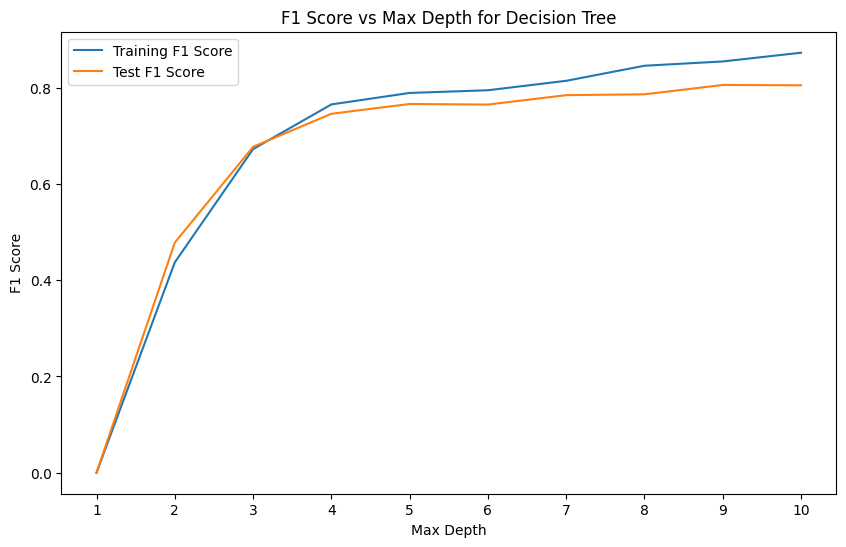

In [605]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

max_depth_range = range(1, 11)  # Setting the range of depths to try
train_f1_scores = []  # List to store training F1 scores for different depths
test_f1_scores = []  # List to store test F1 scores for different depths

# Loop through the range of depths
for depth in max_depth_range:
    # Initialize the DecisionTreeClassifier with the current max_depth
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    # Fit the classifier on the training data
    clf.fit(X_train, y_train)
    
    # Predict on training data and calculate F1 score
    train_preds = clf.predict(X_train)
    train_f1 = f1_score(y_train, train_preds)
    train_f1_scores.append(train_f1)
    
    # Predict on test data and calculate F1 score
    test_preds = clf.predict(X_test)
    test_f1 = f1_score(y_test, test_preds)
    test_f1_scores.append(test_f1)

# Plot the F1 scores over different depths
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, train_f1_scores, label='Training F1 Score')
plt.plot(max_depth_range, test_f1_scores, label='Test F1 Score')
plt.title('F1 Score vs Max Depth for Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('F1 Score')
plt.legend()
plt.xticks(max_depth_range)
plt.show()



In [606]:
import numpy as np
# Identify the best depth
best_depth = max_depth_range[np.argmax(test_f1_scores)]

# Initialize the DecisionTreeClassifier with the best max_depth
best_tree_clf = DecisionTreeClassifier(max_depth=best_depth, random_state=42)

# Fit the classifier on the training data
best_tree_clf.fit(X_train, y_train)

# Predict on test data using the fitted classifier
test_predictions = best_tree_clf.predict(X_test)


# Calculate the F1 score on test data
best_test_f1 = f1_score(y_test, test_predictions)


# Print out the best depth and the corresponding F1 score
print(f"The best max depth is: {best_depth}")
print(f"The F1 score of the decision tree with this depth on the test set is: {best_test_f1}")


The best max depth is: 9
The F1 score of the decision tree with this depth on the test set is: 0.8055130168453293


In [607]:
# # Predict on the actual test data
# actual_test_predictions = best_tree_clf.predict(X_testing)

# # Create the submission DataFrame
# submission = pd.DataFrame({
#     "Id": testingSet["Id"],  
#     "is_fraud": actual_test_predictions
# })

# # Convert to CSV for submission

# submission.to_csv('./submissions/submission_decision_tree.csv', index=False)

In [608]:
display(X)

,amt,zip,lat,long,city_pop,merch_lat,merch_long,day_of_week,hour_of_day,high_risk_time,...,amt_deviation_z,distance_deviation_z,atypical_transaction,age,is_weekend,gender_encoding_M,state_risk_score,city_risk_score,job_risk_score,merchant_risk_score
0,72.18,70062,29.9912,-90.2479,68211,30.424083,-90.080958,2,8,0,...,0.215040,-0.969531,0,83,0,1,1.0,1.0,1.0,1
1,36.66,80736,40.7692,-103.0968,648,39.871664,-103.457961,6,7,0,...,-0.288475,0.978368,0,55,0,1,1.0,1.0,3.0,2
2,1.74,78214,29.3641,-98.4924,1595797,28.456118,-98.491336,6,13,0,...,-0.560623,0.681020,0,29,0,1,1.0,1.0,1.0,2
3,140.99,31547,30.7906,-81.5607,1293,31.292136,-82.002506,1,4,1,...,1.155566,-0.375547,0,61,0,0,2.0,1.0,2.0,3
4,1722.19,29911,32.9413,-81.1807,1725,33.067620,-80.201090,5,17,0,...,9.101567,0.456431,1,50,0,0,3.0,1.0,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486249,4.30,59871,45.8433,-113.8748,218,46.332036,-114.660338,7,13,0,...,-0.972939,0.358629,0,29,0,1,3.0,1.0,3.0,1
486250,34.85,91206,34.1556,-118.2322,172817,33.229608,-118.386434,6,1,1,...,-0.089752,0.928646,0,42,0,1,1.0,1.0,3.0,3
486251,9.22,66941,39.7562,-98.4462,242,39.316927,-97.617048,1,23,1,...,-0.213764,0.304841,0,37,0,0,3.0,1.0,1.0,1
486252,9.39,23850,37.1349,-77.7364,1051,37.084437,-78.715023,4,23,1,...,-0.208586,0.366162,0,48,0,0,1.0,3.0,2.0,1


In [609]:
# Now, there doesnt seem to be any null values, but let's verify:
null_counts = X.isnull().sum()
print("\nNumber of null values in each column:\n", null_counts)


Number of null values in each column:
 amt                      0
zip                      0
lat                      0
long                     0
city_pop                 0
merch_lat                0
merch_long               0
day_of_week              0
hour_of_day              0
high_risk_time           0
category_mean_amt        0
category_std_amt         0
category_outlier         0
is_shopping_net          0
is_entertainment         0
is_shopping_pos          0
is_misc_net              0
is_grocery_pos_0_4       0
is_shopping_net_22_23    0
is_amt_0_50              0
is_amt_250_350           0
is_amt_650_1200          0
distance_from_home       0
mean_amt                 0
mean_distance            0
amt_deviation            0
distance_deviation       0
amt_deviation_z          0
distance_deviation_z     0
atypical_transaction     0
age                      0
is_weekend               0
gender_encoding_M        0
state_risk_score         0
city_risk_score          0
job_risk_score 

## Logistic Regression

In [610]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating a logistic regression model
logistic_model = LogisticRegression()

# Training the logistic regression model
logistic_model.fit(X_train_scaled, y_train)

# Making predictions
y_pred = logistic_model.predict(X_test_scaled)

# Evaluating the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     96886
         1.0       0.84      0.66      0.74       365

    accuracy                           1.00     97251
   macro avg       0.92      0.83      0.87     97251
weighted avg       1.00      1.00      1.00     97251

[[96840    46]
 [  123   242]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Gradient Boosting Algo

In [611]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Initialize the XGBoost model
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy on testing set:", accuracy_score(y_test, y_pred))
print("F1 score on testing set:", f1_score(y_test, y_pred))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy on testing set: 0.9991876690213982
F1 score on testing set: 0.8853410740203194

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     96886
         1.0       0.94      0.84      0.89       365

    accuracy                           1.00     97251
   macro avg       0.97      0.92      0.94     97251
weighted avg       1.00      1.00      1.00     97251



In [612]:
# Predict on the actual test data
actual_test_predictions = model.predict(X_testing)

# Create the submission DataFrame
submission = pd.DataFrame({
    "Id": testingSet["Id"],  
    "is_fraud": actual_test_predictions
})

# Convert to CSV for submission

submission.to_csv('../submissions/submission_gradient_boosting.csv', index=False)
